# Exploratory Analysis 1BH_2018-11-09_12_31_25

In [1]:
from matplotlib import pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

dataset = {}

for file in os.listdir("traces"):
    with open('traces/' + file, 'r') as f:
        dataset[file] = json.load(f)

print('Data sets:')
print(list(dataset.keys()))

Data sets:
['test_1BH_2018-11-09_12_31_25.json', 'test_nom_2018-11-09_08_55_11.json', 'test_1BH_2018-11-09_14_37_46.json']


In [2]:
data = dataset['test_1BH_2018-11-09_12_31_25.json']
nodes = None

for node in data:
    if nodes is None:
        nodes = pd.DataFrame(data[node]['pkts']).drop(['pkt','ttl'], axis=1)
        nodes.columns = [str(node)]
    else:
        df = pd.DataFrame(data[node]['pkts']).drop(['pkt','ttl'], axis=1)
        df.columns = [str(node)]
        nodes = nodes.join(df)

nodes = pd.DataFrame(nodes) 
nodes.head(10)

,aaaa::212:7404:4:404:,aaaa::212:7403:3:303:,aaaa::212:740b:b:b0b:,aaaa::212:7402:2:202:,aaaa::212:7409:9:909:,aaaa::212:740a:a:a0a:,aaaa::212:7405:5:505:,aaaa::212:7408:8:808:,aaaa::212:7407:7:707:
0,1342.0,1311.0,2611.0,1818.0,3389.0,4808.0,2021.0,6662.0,2162.0
1,8170.0,762.0,2005.0,1903.0,2409.0,2145.0,6890.0,4240.0,1981.0
2,973.0,1123.0,2242.0,1700.0,6821.0,2767.0,2384.0,2896.0,1729.0
3,848.0,991.0,2120.0,892.0,2651.0,3040.0,3174.0,4281.0,1634.0
4,1022.0,1165.0,2399.0,875.0,2792.0,4815.0,1851.0,3225.0,1533.0
5,2406.0,908.0,2895.0,3171.0,5088.0,7972.0,1892.0,7573.0,6598.0
6,849.0,1235.0,7921.0,985.0,3401.0,4983.0,1703.0,2995.0,2318.0
7,3766.0,8991.0,8633.0,2442.0,2004.0,4559.0,2041.0,5472.0,2447.0
8,1406.0,1047.0,2716.0,1447.0,2223.0,3165.0,9164.0,3777.0,5783.0
9,824.0,781.0,4632.0,833.0,9803.0,5189.0,8864.0,8165.0,6610.0


Each node communicates with the root of the DODAG through a certain number of hops. The network was configured in order to have three nodes communicating directly with the root, two node at distance 2 and just one node that was at distance 3 from node 'A8-149'.

In [3]:
hops = {}
icmp = [x for x in range(1,len(nodes)+1)]

for node in data:
    df = pd.DataFrame(data[node]['pkts']).drop(['pkt','rtt'], axis=1)
    if df.iloc[0][0] in hops:
        hops[df.iloc[0][0]].append(node)
    else:
        hops[df.iloc[0][0]] = [node]

hop_num = 0
for k in hops.keys():
    hop_num += 1
    hops[hop_num] = hops.pop(k)

# Contain mean time for each distance from the root
hop_nodes = pd.DataFrame({1: nodes[hops[1]].mean(axis=1), 2: nodes[hops[2]].mean(axis=1),\
                           3: nodes[hops[3]].mean(axis=1)})
hop_nodes.head(10)

,1,2,3
0,1490.333333,2264.666667,4953.000000
1,3611.666667,3625.333333,2931.333333
2,1265.333333,2118.333333,4161.333333
3,910.333333,2309.333333,3324.000000
4,1020.666667,1927.666667,3610.666667
5,2161.666667,3795.000000,6877.666667
6,1023.000000,3980.666667,3793.000000
7,5066.333333,4373.666667,4011.666667
8,1300.000000,5887.666667,3055.000000
9,812.666667,6702.000000,7719.000000


For each node we plot the graph that measures the delay with respect to the number of sequence.

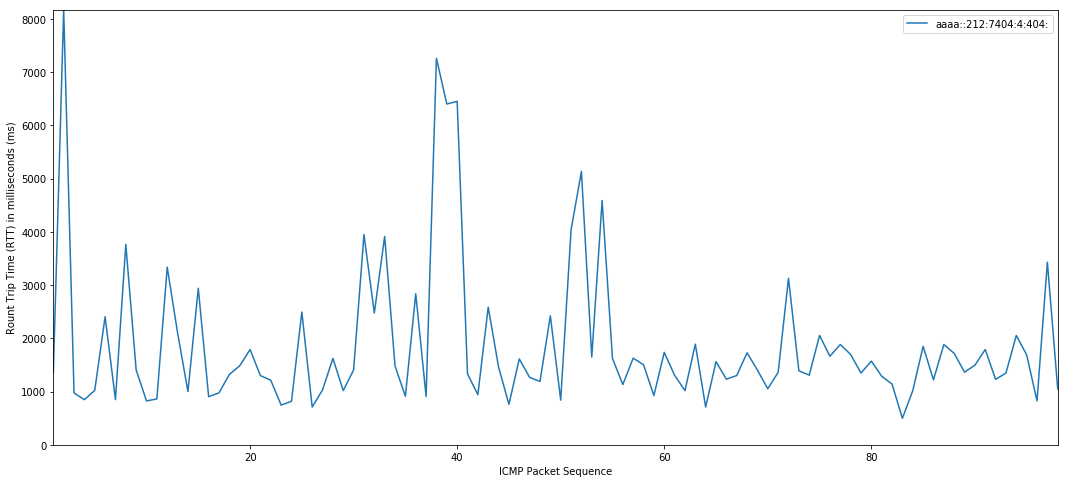

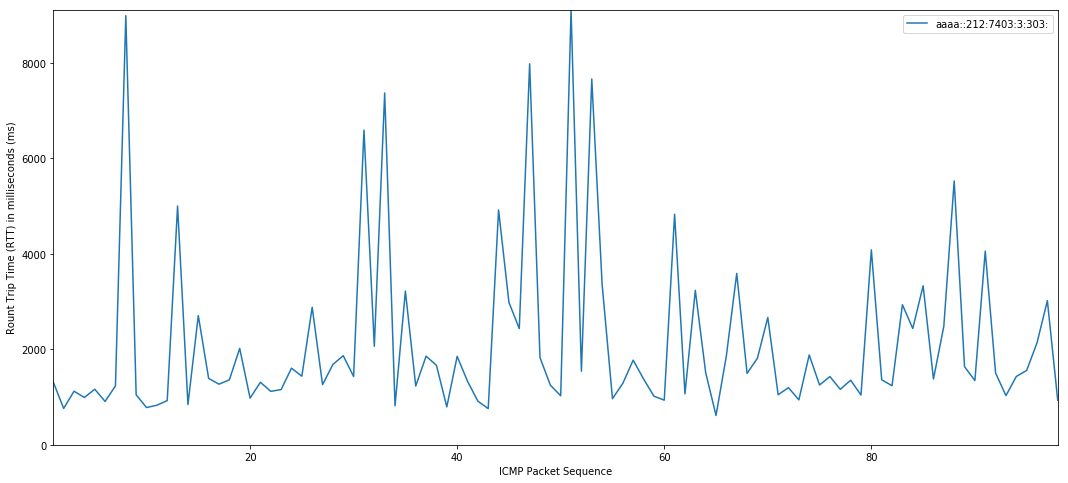

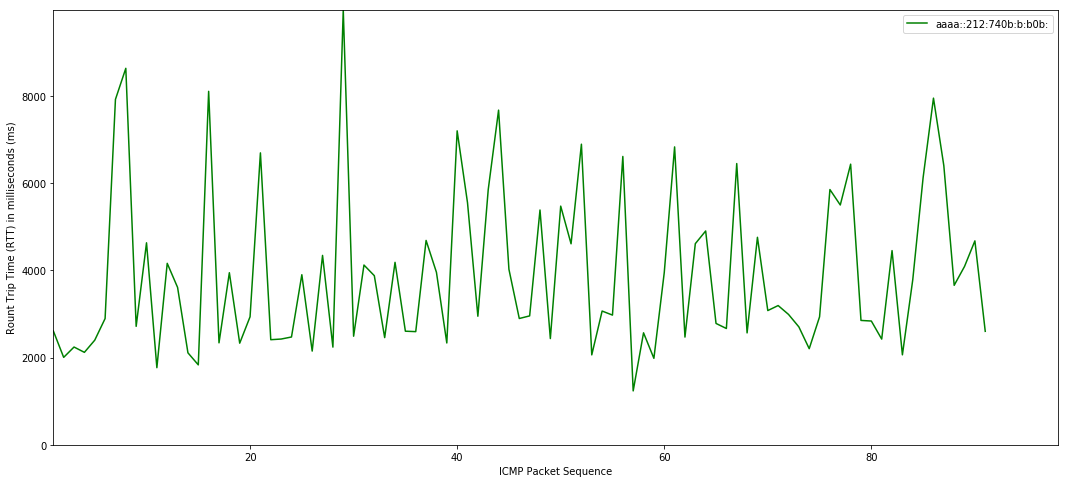

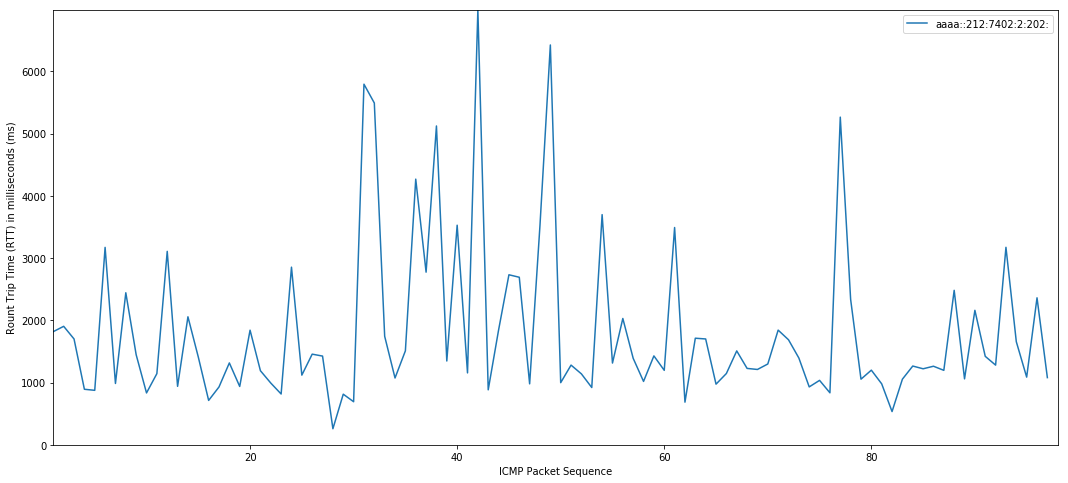

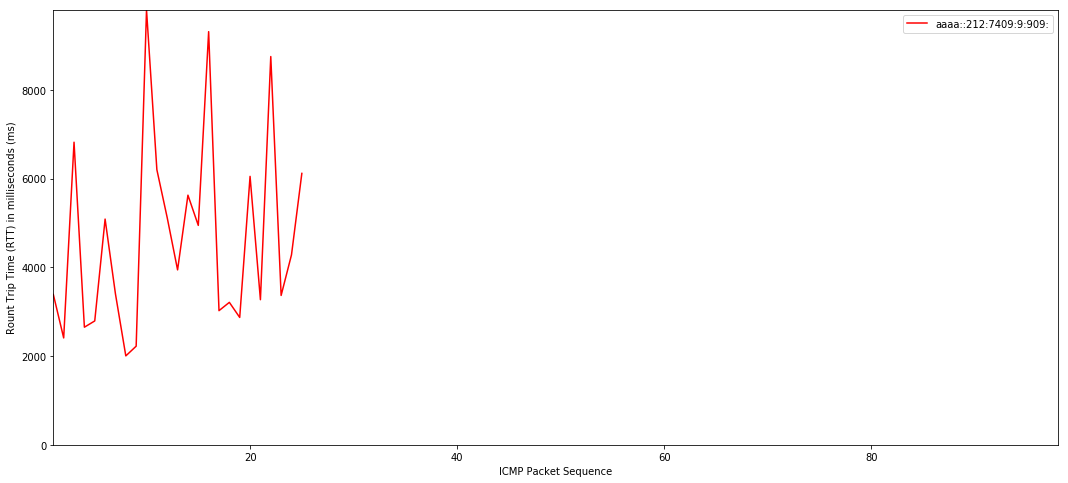

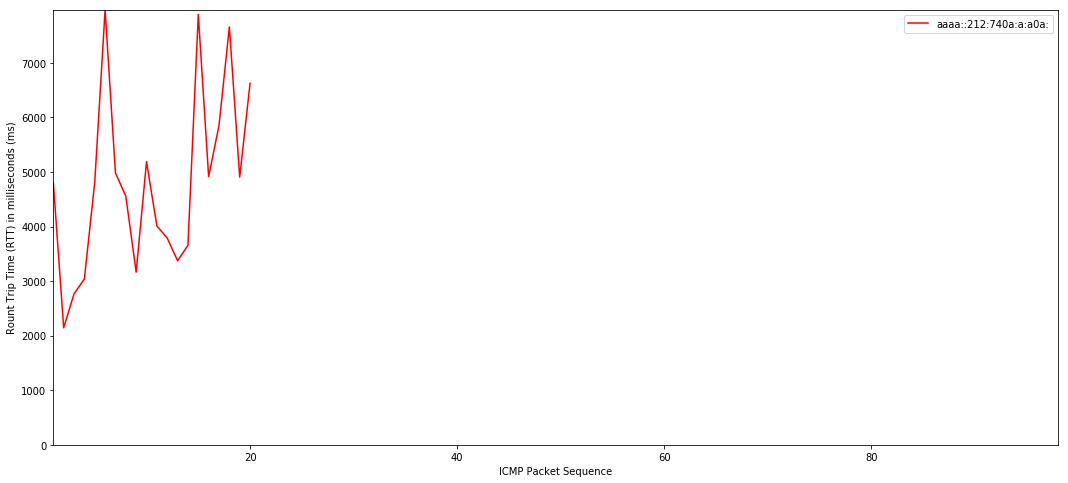

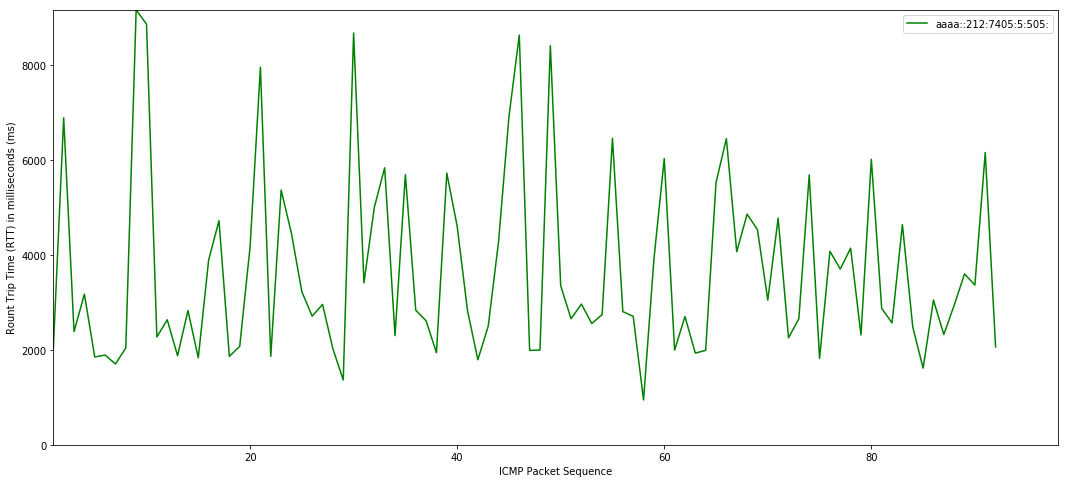

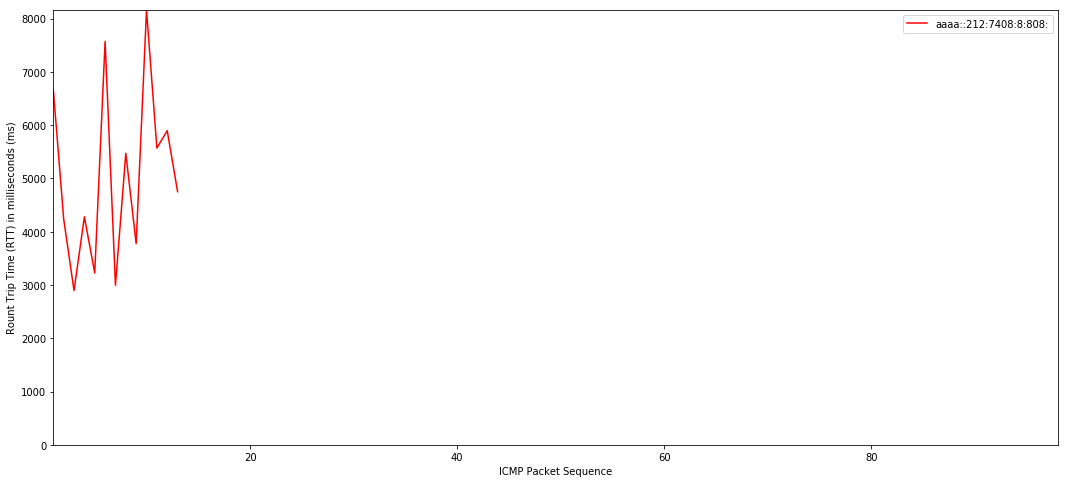

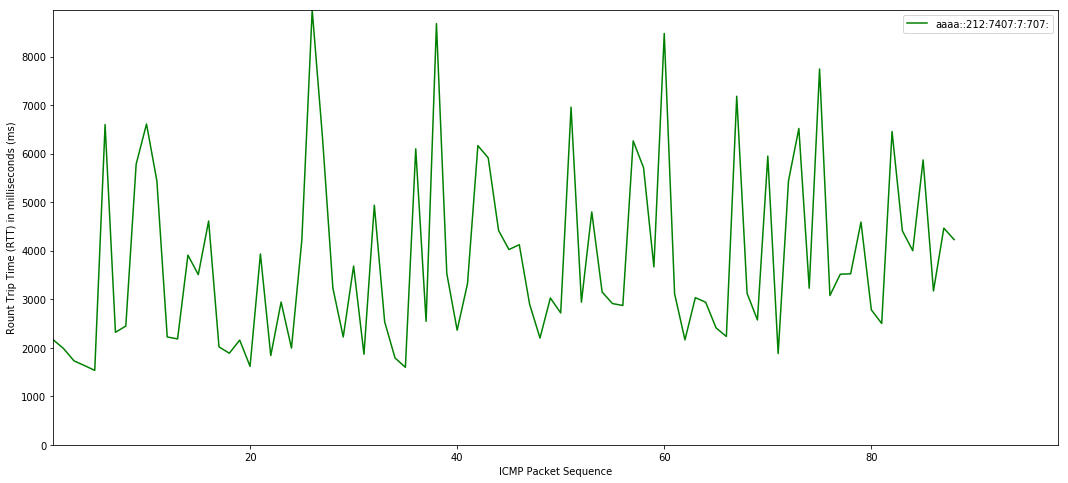

In [4]:
for node in nodes.keys():
    tms = nodes[node]
    
    plt.figure(figsize=(18,8))
    plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
    plt.xlabel('ICMP Packet Sequence')
    
    if node in hops[1]:
        plt.plot(icmp, tms, label=node)
    elif node in hops[2]:
        plt.plot(icmp, tms, 'green', label=node)
    else:
        plt.plot(icmp, tms, 'red', label=node)

    plt.axis([1,icmp[-1], 0.0, tms.max()])
    plt.legend()
    plt.show()

Let us see how does the delay change with respect to the distance from the root.

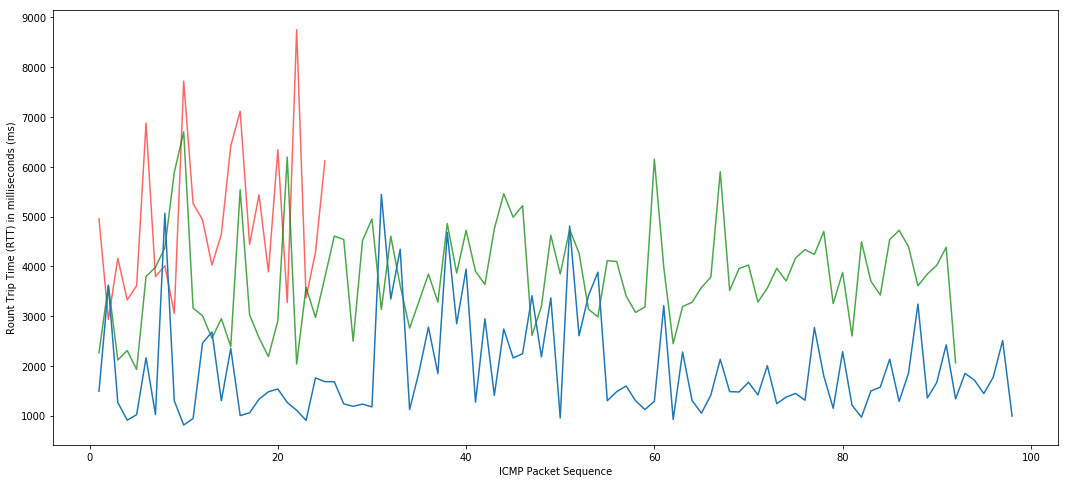

In [5]:
fig, ax = plt.subplots(figsize=(18,8))

line3, = ax.plot(icmp, hop_nodes[3], 'red', alpha=0.6, label='Hop 3')
line2, = ax.plot(icmp, hop_nodes[2], 'green', alpha=0.7, label='Hop 2')
line1, = ax.plot(icmp, hop_nodes[1], label='Hop 1')

plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
plt.xlabel('ICMP Packet Sequence')

plt.show()

It is also interesting to see how the time to complete 2000 pings varies as the distance from the root increases.

In [6]:
time_nodes = {}
for h in hops:
    for time in hop_nodes[h].keys():
        if h not in time_nodes:
            if np.isnan(hop_nodes[h][time]):
                time_nodes[h] = [None]
            else:
                time_nodes[h] = [hop_nodes[h][time]]
        else:
            if np.isnan(hop_nodes[h][time]):
                time_nodes[h].append(None)    
            elif len(list(filter(None, time_nodes[h]))) == 0:
                # time_nodes[h] contains only None values
                time_nodes[h].append(hop_nodes[h][time])
            else:
                time_nodes[h].append(max(filter(None, time_nodes[h])) + hop_nodes[h][time])

time_nodes = pd.DataFrame(time_nodes)
time_nodes.tail(1)

,1,2,3
97,190348.166667,NaN,NaN


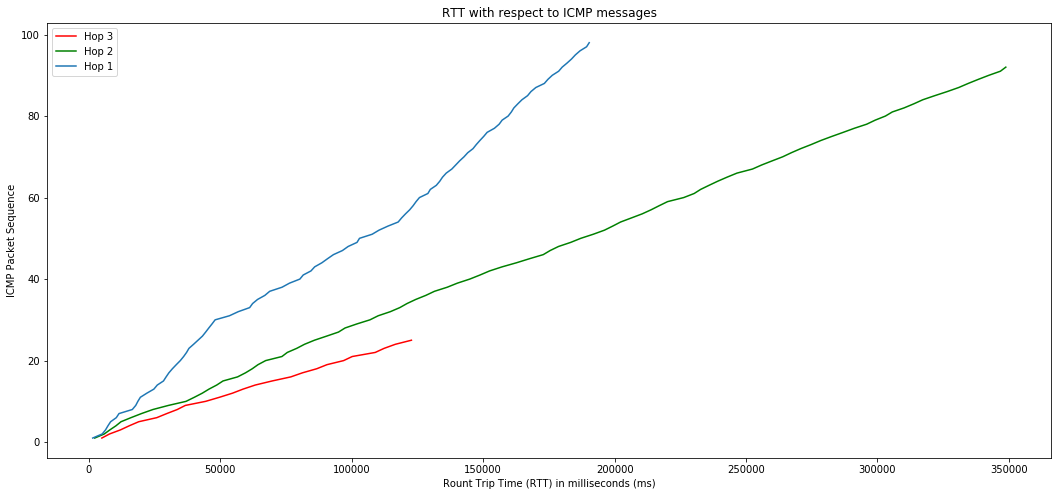

In [7]:
fig, ax = plt.subplots(figsize=(18,8))

line3, = ax.plot(time_nodes[3], icmp, 'red', label='Hop 3')
line2, = ax.plot(time_nodes[2], icmp, 'green', label='Hop 2')
line1, = ax.plot(time_nodes[1], icmp, label='Hop 1')

plt.ylabel('ICMP Packet Sequence')
plt.xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
plt.title('RTT with respect to ICMP messages')
ax.legend()
plt.show()

## Statistics

It is also useful to read some statistics from the dataset. For each node:

In [8]:
nodes.describe()

,aaaa::212:7404:4:404:,aaaa::212:7403:3:303:,aaaa::212:740b:b:b0b:,aaaa::212:7402:2:202:,aaaa::212:7409:9:909:,aaaa::212:740a:a:a0a:,aaaa::212:7405:5:505:,aaaa::212:7408:8:808:,aaaa::212:7407:7:707:
count,98.000000,98.000000,91.000000,97.000000,25.000000,20.000000,92.000000,13.000000,88.000000
mean,1868.816327,2150.826531,3916.604396,1815.742268,4667.000000,4806.350000,3667.793478,5039.076923,3821.000000
std,1403.775442,1818.320416,1873.889033,1308.893667,2220.932875,1692.746764,1942.511168,1707.433281,1836.716617
min,498.000000,615.000000,1236.000000,258.000000,2004.000000,2145.000000,945.000000,2896.000000,1533.000000
25%,1035.750000,1120.750000,2471.000000,1035.000000,3024.000000,3586.250000,2209.000000,3777.000000,2351.000000
50%,1404.500000,1430.500000,3067.000000,1313.000000,3943.000000,4811.500000,2908.000000,4753.000000,3198.500000
75%,1883.750000,2436.250000,4722.000000,2029.000000,6051.000000,5355.000000,4660.750000,5898.000000,4832.750000
max,8170.000000,9112.000000,9972.000000,6985.000000,9803.000000,7972.000000,9164.000000,8165.000000,8961.000000


For each hop:

In [9]:
hop_nodes.describe()

,1,2,3
count,98.000000,92.000000,25.000000
mean,1942.328231,3791.548913,4908.853333
std,1014.589132,1005.417414,1572.169263
min,812.666667,1927.666667,2931.333333
25%,1268.166667,3137.250000,3793.000000
50%,1516.000000,3782.666667,4438.500000
75%,2335.750000,4420.583333,6118.000000
max,5444.333333,6702.000000,8752.000000


Intuitively we do expect the probability of error to increase as the number of Hops increase as well. Let's check:

In [10]:
pd.DataFrame([[h, str((len(hop_nodes[h]) - hop_nodes[h].count())/len(hop_nodes[h])*100) +'%'] for h in hops], \
             columns=['Hop','Probability of Error'])

,Hop,Probability of Error
0,1,0.0%
1,2,6.12244897959%
2,3,74.4897959184%


Let's try to see the statistical distribution of this data. We use a kernel density estimation (a way to estimate the probability density function of a random variable in a non-parametric way) and histograms. We can even anaylise "standard values" (i.e. values in range mean - 2std <= RTT <= mean + 2std) apart from outliers.

In [11]:
std_values = pd.DataFrame(columns=[1,2,3])  # Maintain x(t) if mean-2*std <= x(t) <? mean+2*std
outliers = pd.DataFrame(columns=[1,2,3])    # Maintain x(t) otherwise

for h in hops:
    # Returns two DataFrames containing standard values and outliers
    mn = hop_nodes[h].mean()
    std =hop_nodes[h].std()
    std_window = pd.Series([])  # Standard values
    out_window = pd.Series([])  # Outliers

    for window in (hop_nodes[h].groupby(hop_nodes[h].index // 10 * 10)):
        std_curr = []
        out_curr = []
        for x in window[1]:
            if mn-2*std <= x and x <= mn+2*std:
                std_curr.append(x)
                out_curr.append(None)
            else:
                std_curr.append(None)
                out_curr.append(x)
        
        std_window = std_window.append(pd.Series(std_curr))
        out_window = out_window.append(pd.Series(out_curr))
    
    std_values[h] = std_window
    outliers[h] = out_window

std_values = std_values.reset_index().drop(columns=['index'])
std_values.fillna(value=pd.np.nan, inplace=True)
outliers = outliers.reset_index().drop(columns=['index'])
outliers.fillna(value=pd.np.nan, inplace=True)

Let's start with the whole dataset.

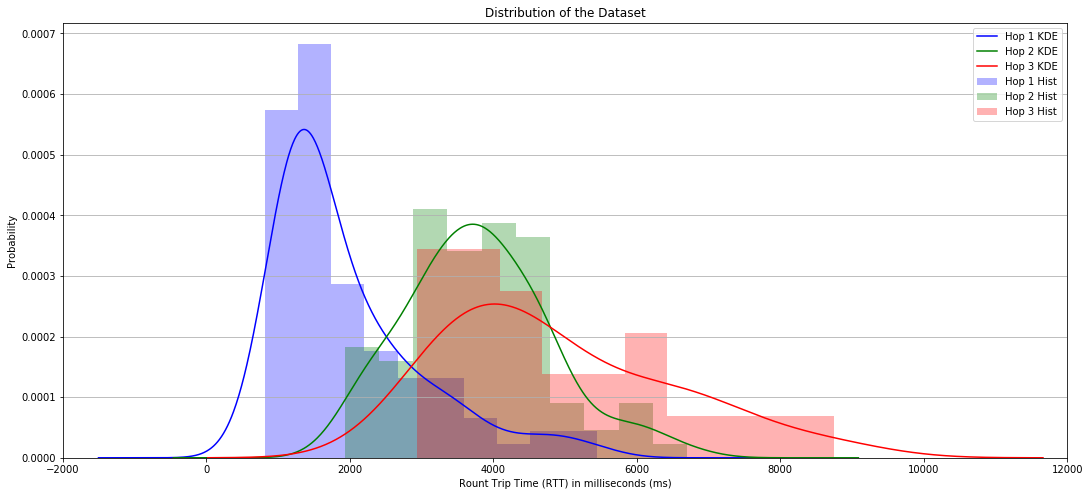

In [18]:
fig, ax = plt.subplots(figsize=(18,8))
for hop in hop_nodes:
    
    if hop == 1:
        hop_nodes[hop].plot.kde(ax=ax,color='blue', title='Hop ' + str(hop), label='Hop 1 KDE')
        hop_nodes[hop].plot.hist(density=True,color='blue',alpha=0.3, ax=ax, label='Hop 1 Hist')
    elif hop == 2:
        hop_nodes[hop].plot.kde(ax=ax,color='green', title='Hop ' + str(hop), label='Hop 2 KDE')
        hop_nodes[hop].plot.hist(density=True,color='green',alpha=0.3, ax=ax, label='Hop 2 Hist')
    else:
        hop_nodes[hop].plot.kde(ax=ax,color='red', title='Hop ' + str(hop), label='Hop 3 KDE')
        hop_nodes[hop].plot.hist(density=True,color='red',alpha=0.3, ax=ax, label='Hop 3 Hist')
        
ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Dataset')
ax.set_xlim([-2000,12000])
ax.legend()
plt.show()

Now we plot all values RTT excluding outliers (values in the range mean - 2std <= RTT <= mean + 2std).

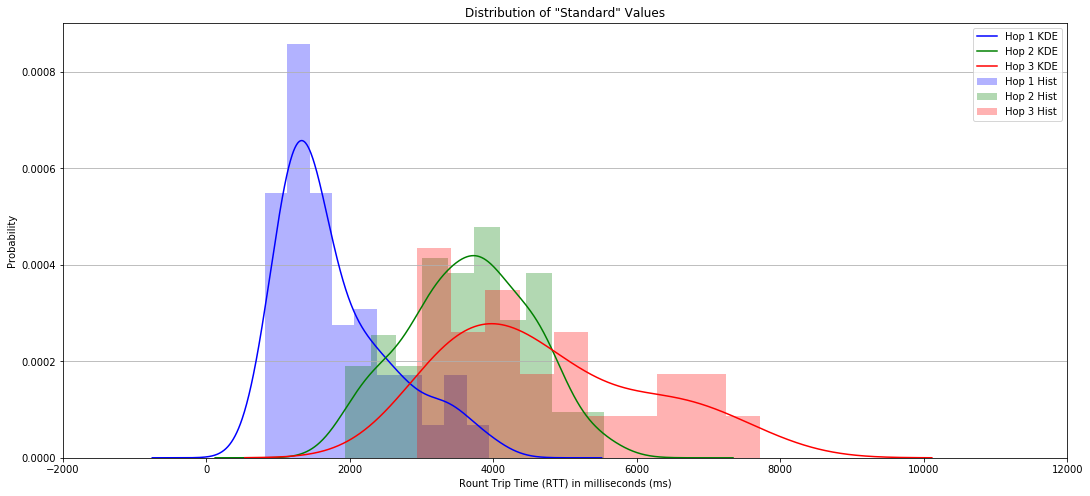

In [19]:
fig, ax = plt.subplots(figsize=(18,8))
for hop in std_values:
    
    if hop == 1:
        std_values[hop].plot.kde(ax=ax,color='blue', label='Hop 1 KDE')
        std_values[hop].plot.hist(density=True,color='blue',alpha=0.3, ax=ax, label='Hop 1 Hist')
    elif hop == 2:
        std_values[hop].plot.kde(ax=ax,color='green', label='Hop 2 KDE')
        std_values[hop].plot.hist(density=True,color='green',alpha=0.3, ax=ax, label='Hop 2 Hist')
    else:
        std_values[hop].plot.kde(ax=ax,color='red', label='Hop 3 KDE')
        std_values[hop].plot.hist(density=True,color='red',alpha=0.3, ax=ax, label='Hop 3 Hist')
        
ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.set_title('Distribution of "Standard" Values')
ax.grid(axis='y')
ax.legend()
ax.set_xlim([-2000,12000])
plt.show()

And finally the distribution of outliers.

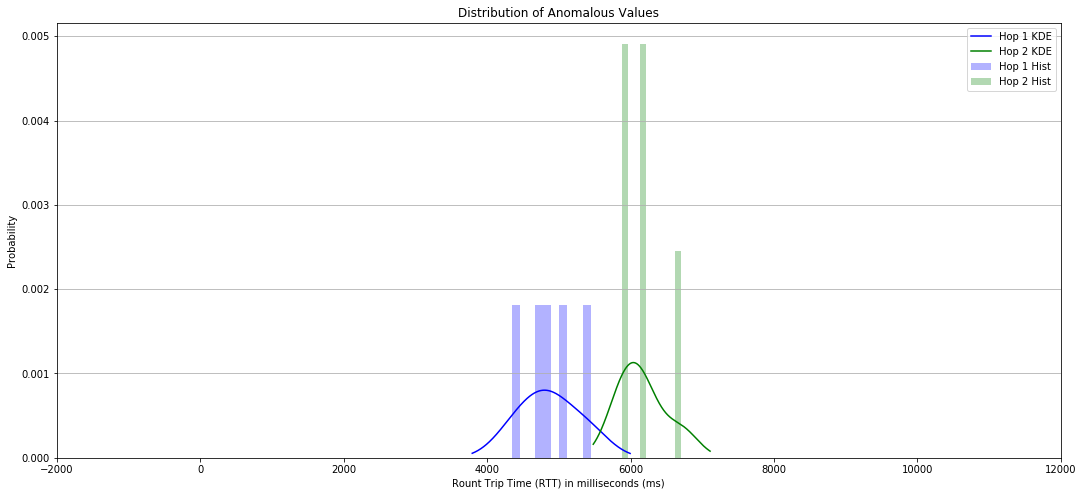

In [35]:
fig, ax = plt.subplots(figsize=(18,8))
for hop in outliers:
    
    if hop == 1:
        outliers[hop].plot.kde(ax=ax,color='blue', label='Hop 1 KDE')
        outliers[hop].plot.hist(density=True,color='blue',alpha=0.3, ax=ax, label='Hop 1 Hist')
    elif hop == 2:
        outliers[hop].plot.kde(ax=ax,color='green', label='Hop 2 KDE')
        outliers[hop].plot.hist(density=True,color='green',alpha=0.3, ax=ax, label='Hop 2 Hist')
    #else:
        #outliers[hop].plot.kde(ax=ax,color='red', label='Hop 3 KDE')
        #outliers[hop].plot.hist(density=True,color='red',alpha=0.3, ax=ax, label='Hop 3 Hist')
        
ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of Anomalous Values')
ax.legend()
ax.set_xlim([-2000,12000])
plt.show()

# Tumbling Windows

Now we analyse the dataset using tumbling windows of size 10. This could help us to find other relations inside the data.

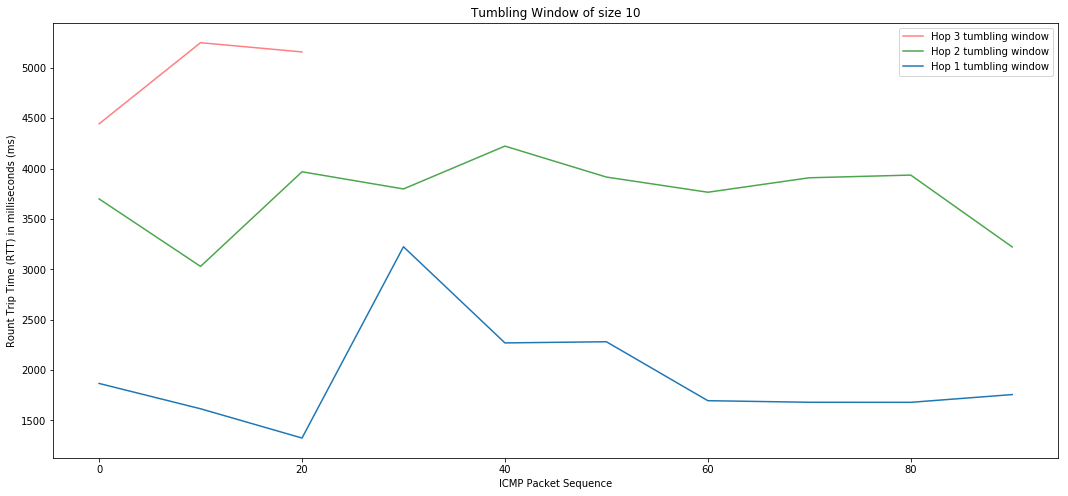

In [15]:
plt.figure(figsize=(18,8))
plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
plt.xlabel('ICMP Packet Sequence')
plt.plot(hop_nodes[3].groupby(hop_nodes[3].index // 10 * 10).mean(), 'red', alpha=0.5, label='Hop 3 tumbling window')
plt.plot(hop_nodes[2].groupby(hop_nodes[2].index // 10 * 10).mean(), 'green', alpha=0.7, label='Hop 2 tumbling window')
plt.plot(hop_nodes[1].groupby(hop_nodes[1].index // 10 * 10).mean(), label='Hop 1 tumbling window')
plt.title('Tumbling Window of size 10')
plt.legend()

Let us try to exclude outliers from this plot.

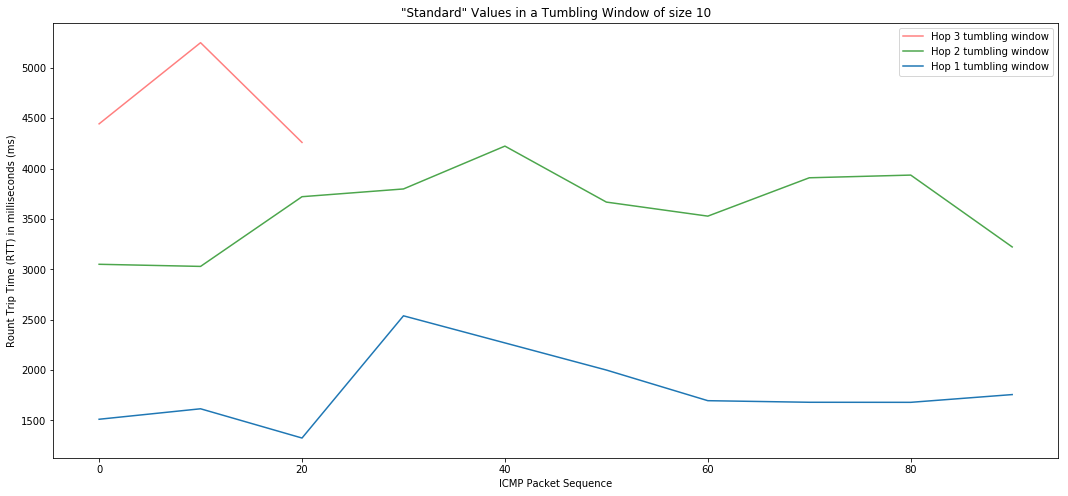

In [16]:
plt.figure(figsize=(18,8))
plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
plt.xlabel('ICMP Packet Sequence')
plt.plot(std_values[3].groupby(std_values[3].index // 10 * 10).mean(), 'red', alpha=0.5, label='Hop 3 tumbling window')
plt.plot(std_values[2].groupby(std_values[2].index // 10 * 10).mean(), 'green', alpha=0.7, label='Hop 2 tumbling window')
plt.plot(std_values[1].groupby(std_values[1].index // 10 * 10).mean(), label='Hop 1 tumbling window')
plt.title('"Standard" Values in a Tumbling Window of size 10')
plt.legend()

For each hop, we plot one dimensional points that represent outliers.

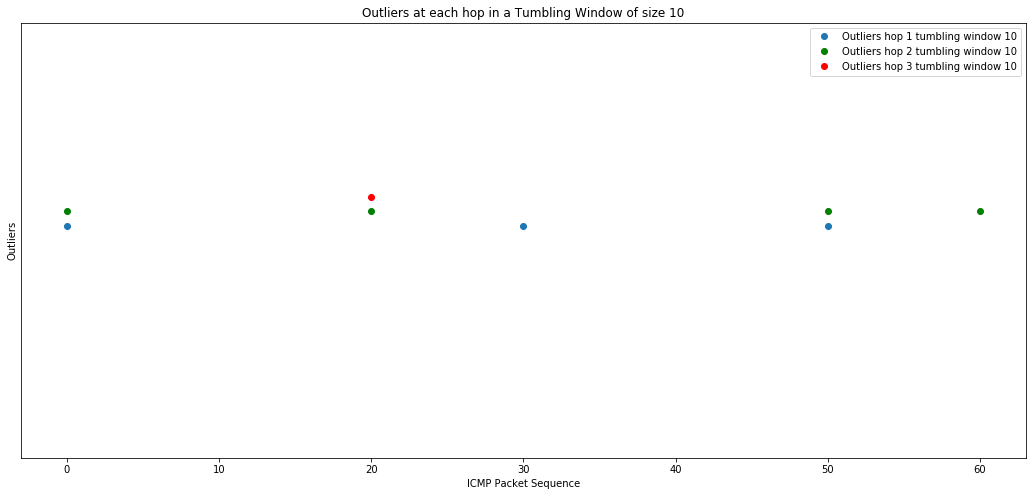

In [17]:
plt.figure(figsize=(18,8))
plt.ylabel('Outliers')
plt.xlabel('ICMP Packet Sequence')
for h in hop_nodes:
    if h == 2:
        plt.plot(outliers[h].groupby(outliers[h].index // 10 * 10).mean().dropna().index, [h for x in outliers[h].groupby(outliers[h].index // 10 * 10).mean().dropna().index], 'o', color='green', label='Outliers hop '+str(h)+' tumbling window 10')
    elif h == 3:
        plt.plot(outliers[h].groupby(outliers[1].index // 10 * 10).mean().dropna().index, [h for x in outliers[h].groupby(outliers[1].index // 10 * 10).mean().dropna().index], 'o', color='red', label='Outliers hop '+str(h)+' tumbling window 10')
    else: 
        plt.plot(outliers[h].groupby(outliers[1].index // 10 * 10).mean().dropna().index, [h for x in outliers[h].groupby(outliers[1].index // 10 * 10).mean().dropna().index], 'o', label='Outliers hop '+str(h)+' tumbling window 10')
    
    
plt.title('Outliers at each hop in a Tumbling Window of size 10')
plt.ylim([-15,15])
plt.yticks([])
plt.legend()